In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import numpy as np
import os

In [2]:
img_glob = glob('/home/dspuser/' + '*.jpg')
img_glob

['/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img1015.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1029.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1072.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_3_Paris_img1013.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1098.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1030.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1070.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img1086.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1053.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1049.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img10.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1069.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_5_Khartoum_img1014.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_3_Paris_img1019.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1067.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_4_Shanghai_img1012.jpg',
 '/home/dspuser/MUL-PanSharpen_AOI_2_Vegas_img109.jpg'

In [3]:
mask_path_list = []
GT_path = '/data/spacenet/bldg/data/pytorch-train/masks/0/'
for idx, path in enumerate(img_glob):
    img_name = os.path.splitext(os.path.split(path)[-1])[0] + '.tif'
    mask_path_list += [os.path.join(GT_path, img_name)]
mask_path_list

['/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_2_Vegas_img1015.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img1029.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1072.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_3_Paris_img1013.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1098.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_img1030.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1070.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_2_Vegas_img1086.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1053.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_4_Shanghai_img1049.tif',
 '/data/spacenet/bldg/data/pytorch-train/masks/0/MUL-PanSharpen_AOI_5_Khartoum_

In [4]:
maskList = []
for idx, img in enumerate(mask_path_list):
    image = np.array(imread(img)[:,:,0])
    maskList += [image]
    
maskArr = np.array(maskList)

In [5]:
imgList = []
for idx, img in enumerate(img_glob):
    image = np.array(imread(img))
    imgList += [image]
    
imgArr = np.array(imgList)

In [6]:
imgArr.shape

(38, 128, 128)

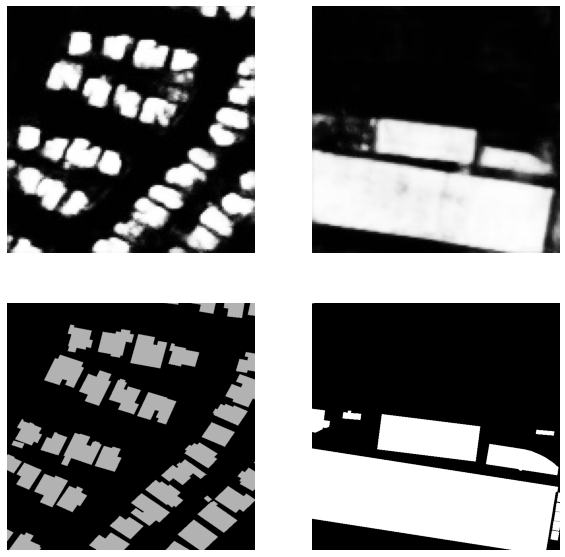

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for idx, ax in enumerate(axs[0]):
    ax.imshow(imgArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')
for idx, ax in enumerate(axs[1]):
    ax.imshow(maskArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')        

In [13]:
glob(os.path.join('/data/spacenet/bldg/data/pytorch-train', 'images', '*' + '.tif'))

['/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_5_Khartoum_img1210.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_4_Shanghai_img1587.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_2_Vegas_img3368.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_4_Shanghai_img2012.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_2_Vegas_img1255.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_5_Khartoum_img559.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_3_Paris_img783.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_5_Khartoum_img889.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_4_Shanghai_img5904.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_4_Shanghai_img6273.tif',
 '/data/spacenet/bldg/data/pytorch-train/images/MUL-PanSharpen_AOI_2_Vegas_img3153.tif',
 '/